In [33]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# read trees as matrix. https://stackoverflow.com/questions/4315506/load-csv-into-2d-matrix-with-numpy-for-plotting
trees = pd.read_csv("./data/bipartition_4taxa_tree.csv")
trees.shape

(50000, 7)

In [34]:

'''
Use the following code to check the mean and standard deviation

x = trees.values
x = StandardScaler().fit_transform(x)
np.mean(x),np.std(x)
'''
trees.head()

,0,1,2,3,4,5,6
0,1.207652,1.207652,1.593392,6.139258,0.38574,0.000000,0.000000
1,2.093894,0.852455,0.852455,2.093894,0.00000,0.000000,1.779641
2,2.287441,1.534422,1.534422,2.006191,0.00000,0.000000,0.471769
3,2.399569,0.629763,0.629763,4.712063,0.00000,0.000000,1.769806
4,1.524985,2.408900,1.524985,4.543632,0.00000,0.883915,0.000000


In [35]:
# generate normalized data

def normalize(trees, n):
    # https://www.datacamp.com/tutorial/principal-component-analysis-in-python
    x = trees.values
    x = StandardScaler().fit_transform(x)
    title = []
    for i in range(2**(n-1) - 1):
        title.append(i)
    normal_tree = pd.DataFrame(x, columns = title)
    return normal_tree

In [36]:
normal_tree = normalize(trees, 4)
normal_tree.head()

,0,1,2,3,4,5,6
0,-0.338846,-0.333475,0.327649,1.174701,0.271630,-0.457130,-0.463396
1,0.546846,-0.678156,-0.503776,-0.866201,-0.287404,-0.457130,1.358438
2,0.740273,-0.016380,0.261477,-0.910447,-0.287404,-0.457130,0.019558
3,0.852331,-0.894255,-0.753665,0.454676,-0.287404,-0.457130,1.348370
4,-0.021710,0.832208,0.250888,0.369702,-0.287404,0.435895,-0.463396


In [43]:
# try k-means.https://koalatea.io/python-plot-kmeans-clusters/
# generate label dataframe
from sklearn.cluster import KMeans
def cluster_tree(tree, num=2):
    model = KMeans(n_clusters = num, random_state=0)
    label = model.fit_predict(tree)
    label_df = pd.DataFrame(label, columns = ["label"])
    return label_df

In [44]:
label_df = cluster_tree(normal_tree, 2)
label_df

,label
0,0
1,1
2,0
3,1
4,0
...,...
49995,0
49996,0
49997,0
49998,0


In [45]:
label_df.value_counts()

label
0        41182
1         8818
dtype: int64

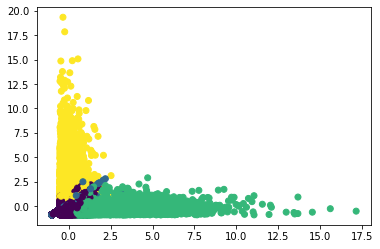

In [40]:
import matplotlib.pyplot as plot

#get cols
tree_0 = np.array(normal_tree.iloc[:,1])
tree_1 = np.array(normal_tree.iloc[:,2])
label = np.array(label_df)

plot.scatter(tree_0, tree_1, c = label)

In [30]:
# test PCA https://www.datacamp.com/tutorial/principal-component-analysis-in-python
from sklearn.decomposition import PCA

def PCAtrees(trees):
    # get values in dataframe
    x = trees.values
    # determine the column number
    pca = PCA(n_components = 2)
    pca_tree = pca.fit_transform(x)
    pca_df = pd.DataFrame(pca_tree, columns = ["feature0" ,"feature1"])
    return pca_df

In [41]:
PCA_trees = PCAtrees(normal_tree)
PCA_trees

,feature0,feature1
0,-0.017964,0.283746
1,1.536363,-0.499718
2,0.618019,0.316460
3,1.779240,-0.971244
4,-0.876220,-0.075991
...,...,...
49995,0.928158,-0.679623
49996,-0.789371,-0.501560
49997,0.580183,-0.670071
49998,-0.922082,-0.383723


<AxesSubplot:xlabel='feature0', ylabel='feature1'>

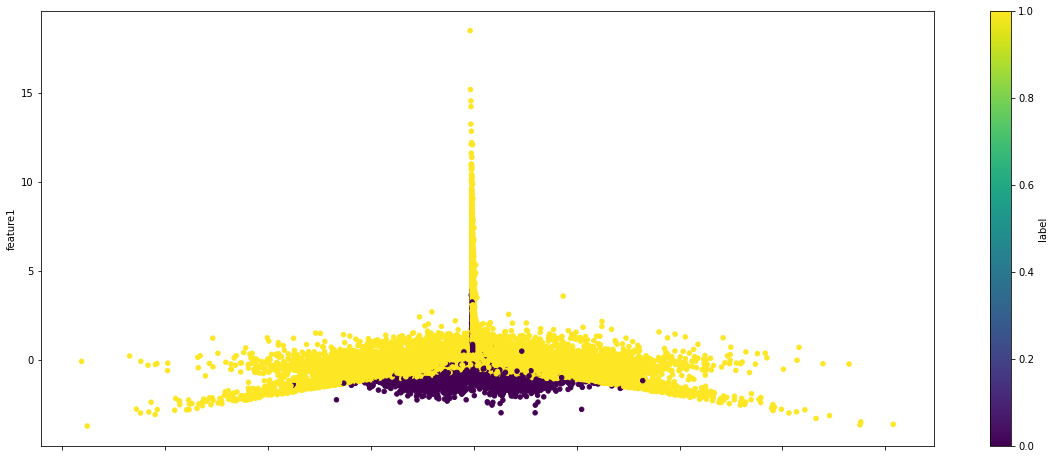

In [108]:
# cluster trees before normalizing
trees = pd.read_csv("./data/bipartition_4taxa_tree.csv")
label_df = cluster_tree(trees, 2)
normal_tree = normalize(trees, 4)
PCA_trees = PCAtrees(normal_tree)
final_df = pd.concat([PCA_trees,label_df], axis = 1)
final_df.plot.scatter(x = "feature0", y = "feature1", c ='label',cmap="viridis",figsize=(20,8))

In [42]:
# generate and plot clusters. 'tree' should be nomarlized trees, 'n' is the number of clusters
def plot_cluster(tree, n=2):
    label_df = cluster_tree(tree, n)
    PCA_trees = PCAtrees(tree)
    final_df = pd.concat([PCA_trees,label_df], axis = 1)
    final_df.plot.scatter(x = "feature0", y = "feature1", c ='label',cmap="viridis",figsize=(20,8))

(None, None, None, None)

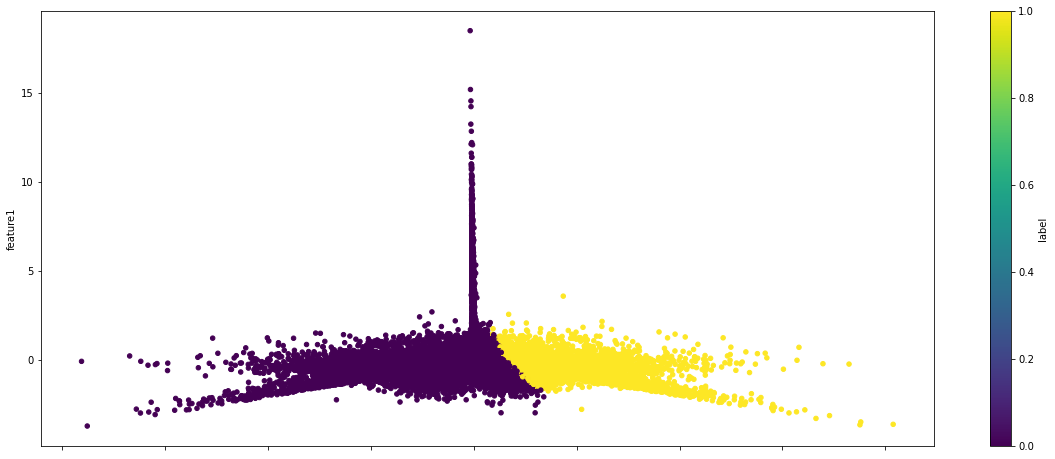

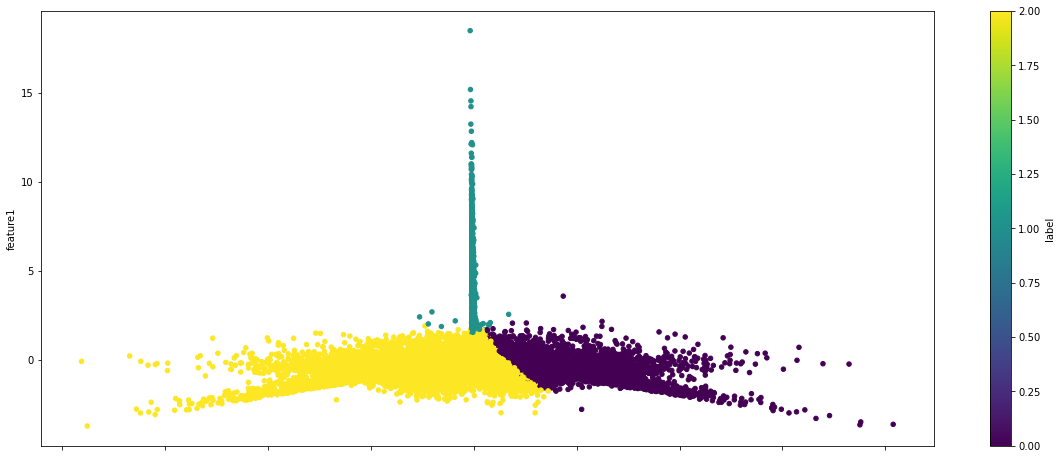

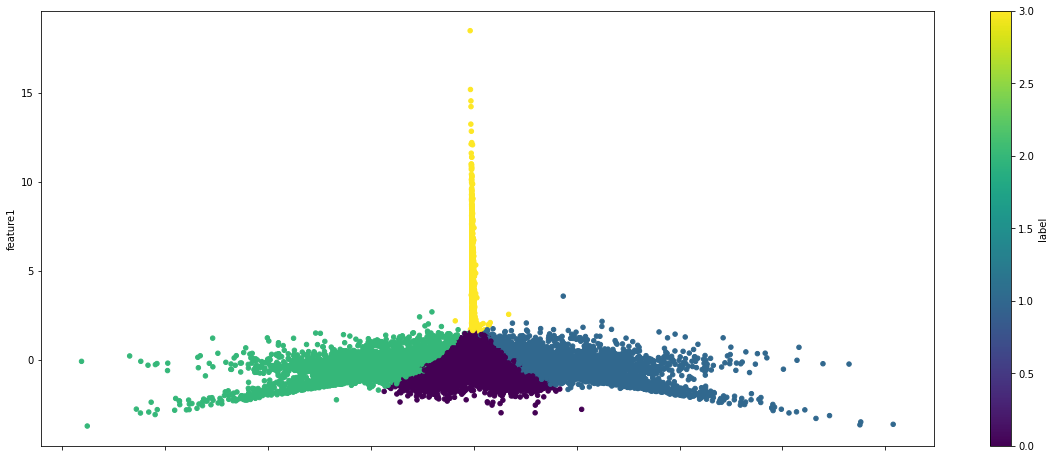

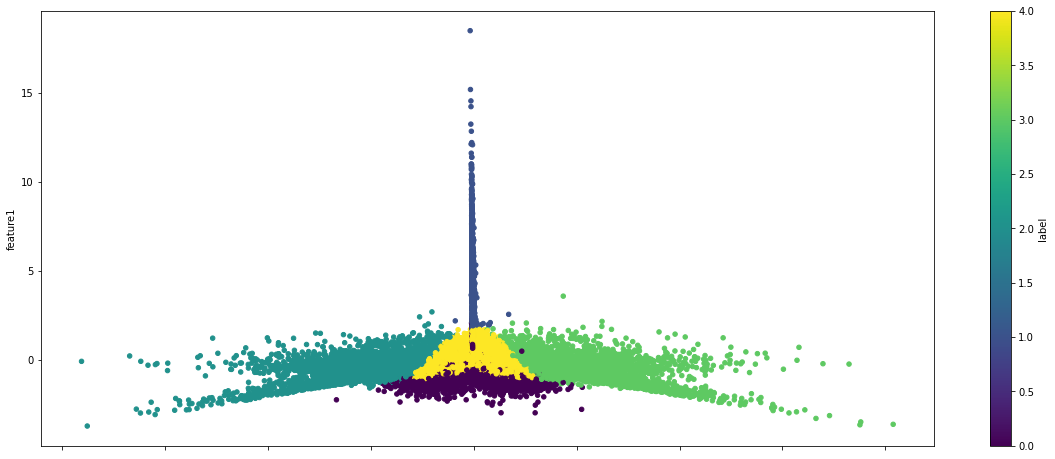

In [111]:
# cluster trees after normalizing
# 4 taxa trees with 2 clusters
trees = pd.read_csv("./data/bipartition_4taxa_tree.csv")
normal_tree = normalize(trees, 4)
plot_cluster(normal_tree, 2),plot_cluster(normal_tree, 3),plot_cluster(normal_tree, 4),plot_cluster(normal_tree, 5)

(None, None, None)

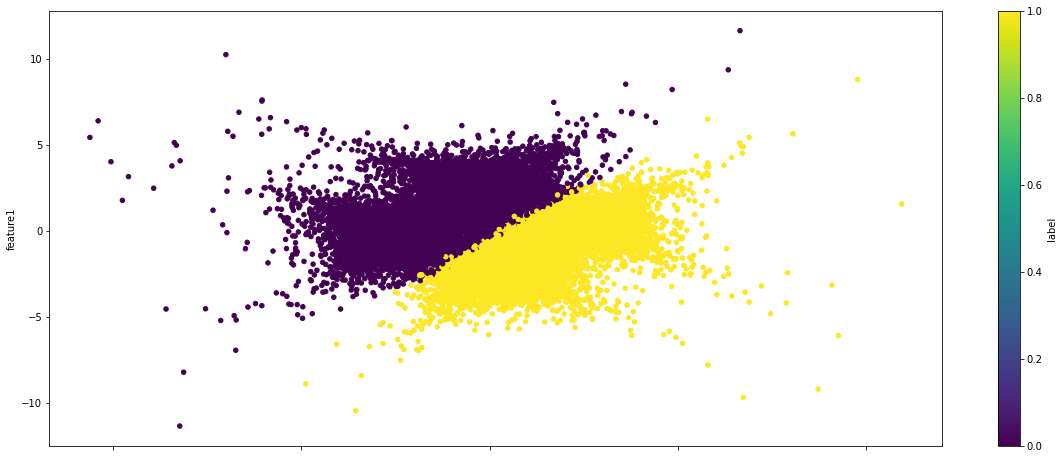

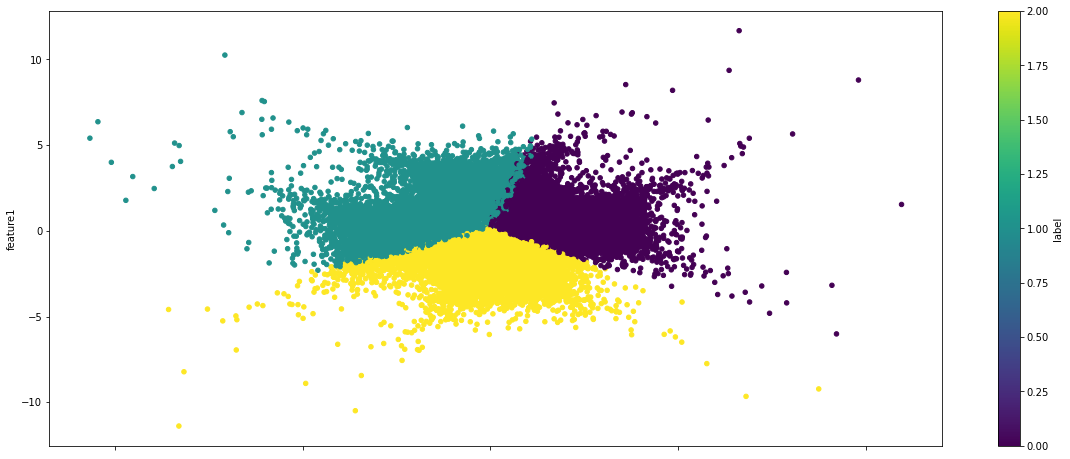

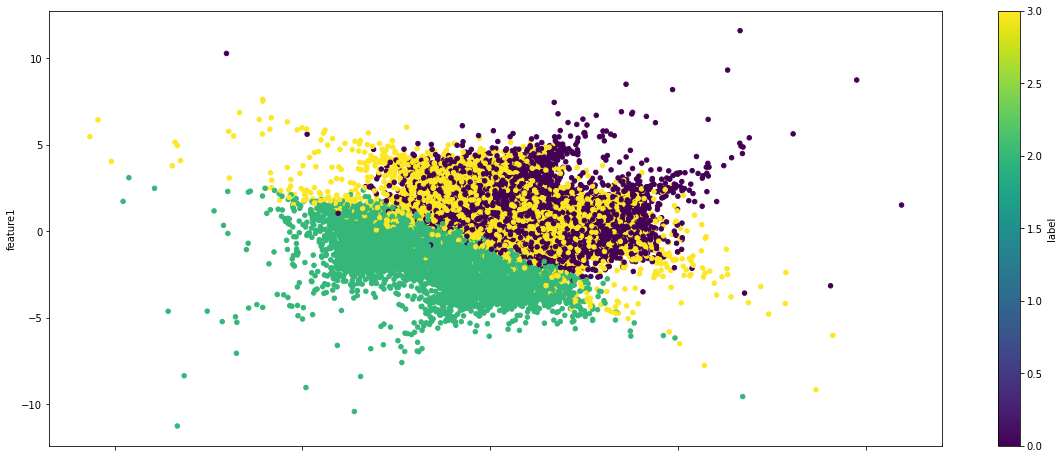

In [112]:
# test 8 taxa trees
trees = pd.read_csv("./data/bipartition_8taxa_tree.csv")
normal_tree = normalize(trees, 8)
plot_cluster(normal_tree, 2),plot_cluster(normal_tree, 3),plot_cluster(normal_tree, 4)

(None, None)

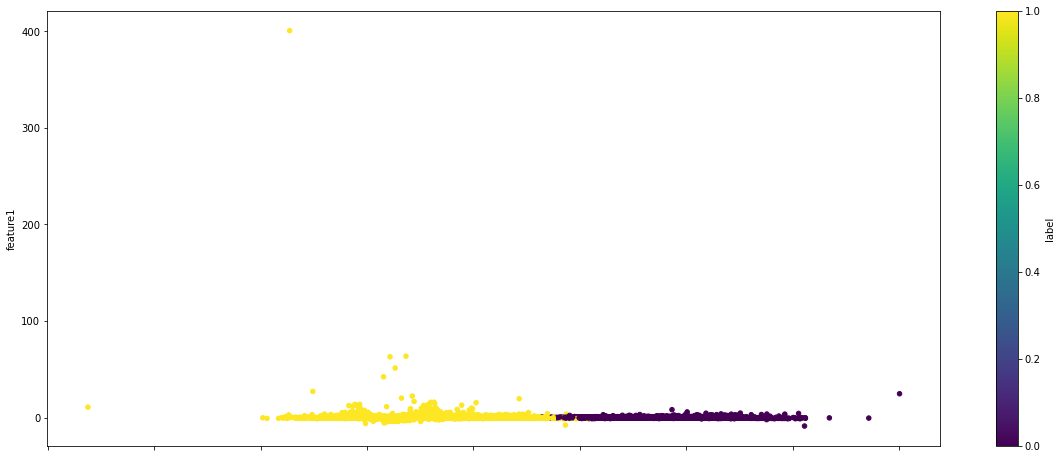

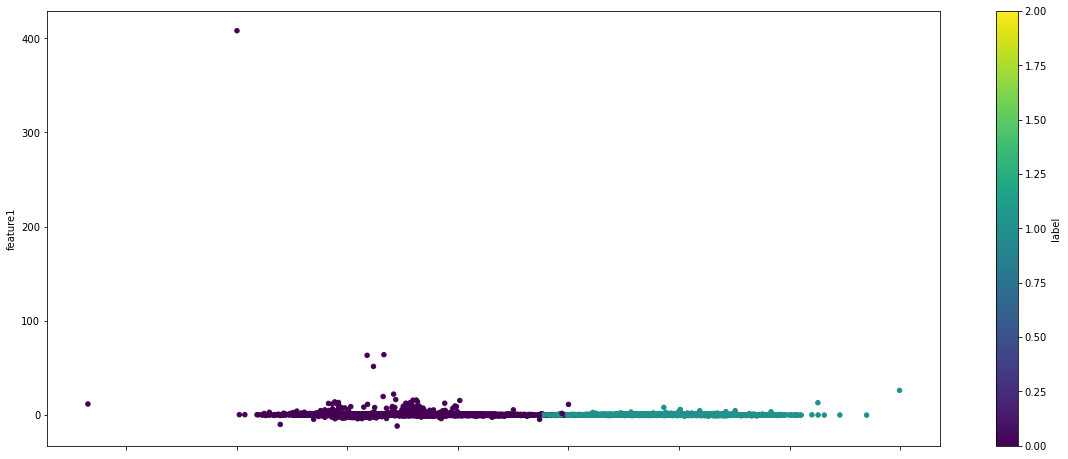

In [113]:
# test 10 taxa trees
trees = pd.read_csv("./data/bipartition_10taxa_tree.csv")
normal_tree = normalize(trees, 10)
plot_cluster(normal_tree, 2), plot_cluster(normal_tree, 3)

In [114]:
# normalization is not good for trees with > 4 taxa
x = trees.values
x = StandardScaler().fit_transform(x)
np.mean(x),np.std(x)

(-1.0463193694809397e-17, 0.5902004701048089)

In [130]:
# draw samples from trees
import random
def draw(trees, n = 1000):
    value = trees.values.tolist()
    sample = random.sample(value, n)
    sample_df = pd.DataFrame(sample)
    return sample_df

In [131]:
trees = pd.read_csv("./data/bipartition_4taxa_tree.csv")
sample = draw(trees)
sample

,0,1,2,3,4,5,6
0,1.072119,1.894752,1.072119,2.418870,0.000000,0.822633,0.000000
1,2.390155,0.984383,0.984383,2.537061,0.000000,0.000000,1.405771
2,1.671827,1.671827,2.525521,2.525521,6.960219,0.000000,0.000000
3,1.040730,1.040730,2.035618,2.035618,1.996744,0.000000,0.000000
4,0.589461,2.069017,0.589461,2.249151,0.000000,1.479556,0.000000
...,...,...,...,...,...,...,...
995,0.898254,4.060313,0.898254,4.273383,0.000000,3.162059,0.000000
996,1.730751,3.079779,1.730751,3.079779,0.000000,3.502192,0.000000
997,0.552678,1.313348,0.552678,7.490344,0.000000,0.760670,0.000000
998,1.749514,3.289433,1.749514,2.340061,0.000000,0.590546,0.000000


(None, None, None)

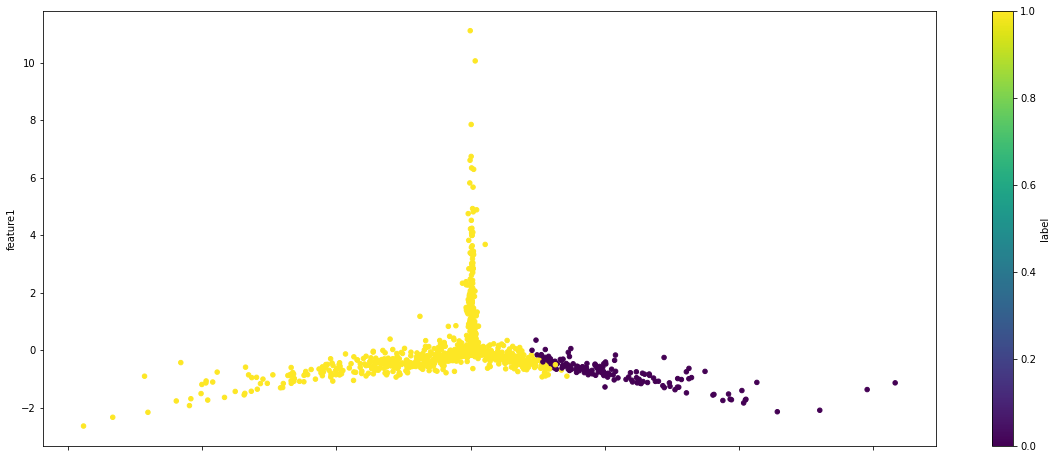

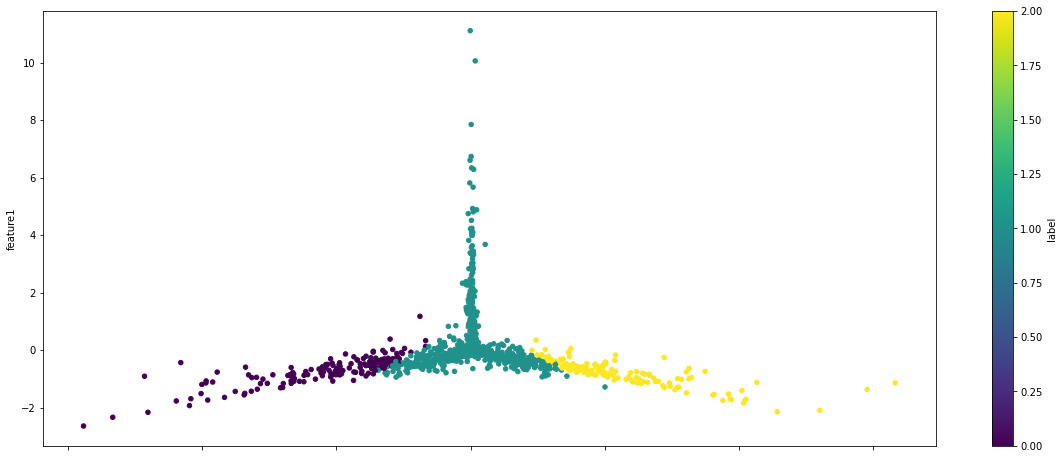

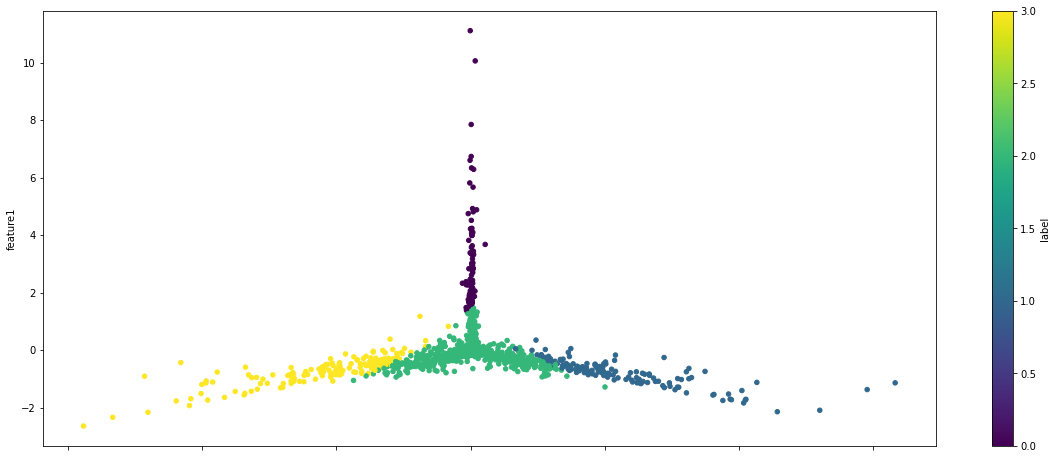

In [132]:
normal_sample = normalize(sample, 4)
plot_cluster(normal_sample, 2),plot_cluster(normal_sample, 3),plot_cluster(normal_sample, 4)

(None, None, None)

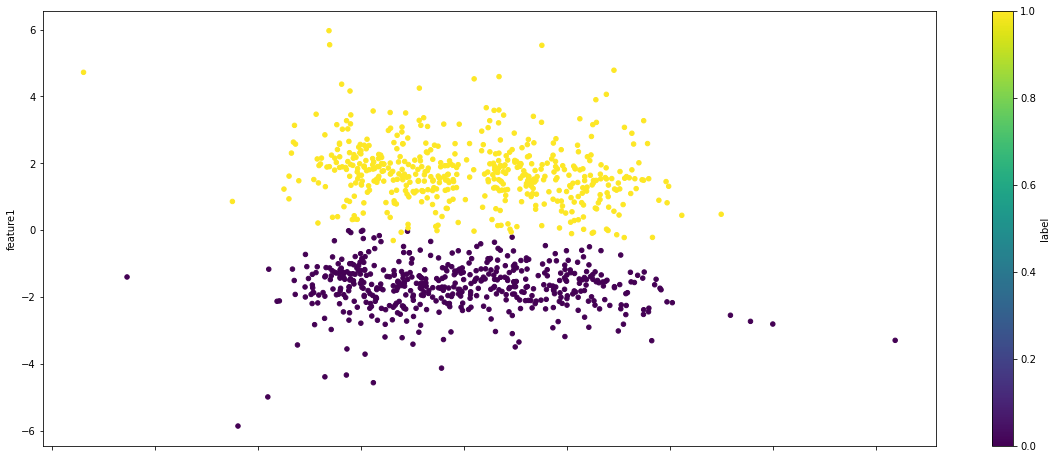

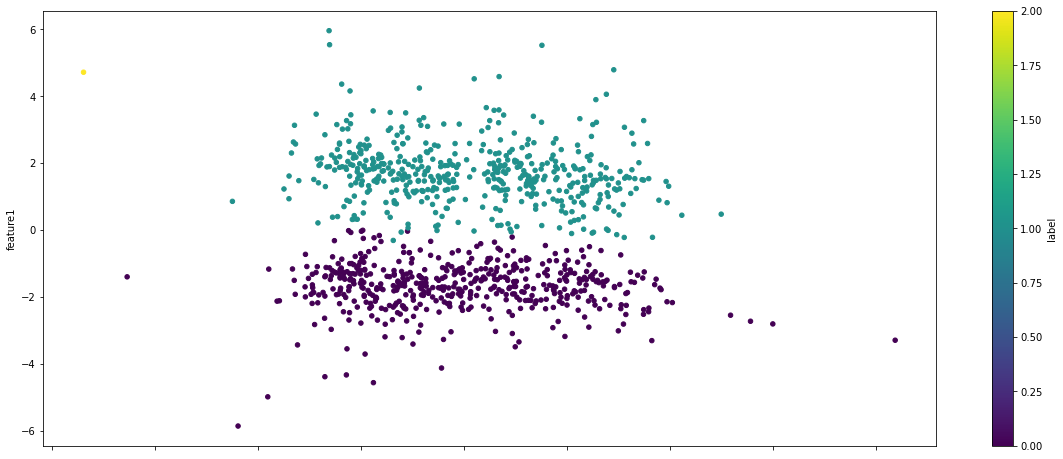

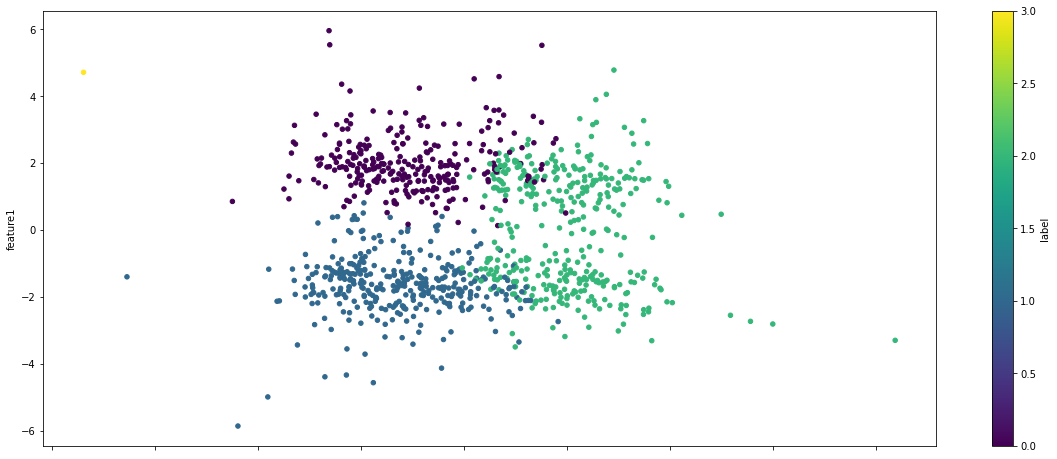

In [118]:
trees = pd.read_csv("./data/bipartition_8taxa_tree.csv")
sample = draw(trees)
normal_sample = normalize(sample, 8)
plot_cluster(normal_sample, 2),plot_cluster(normal_sample, 3),plot_cluster(normal_sample, 4)

(None, None, None)

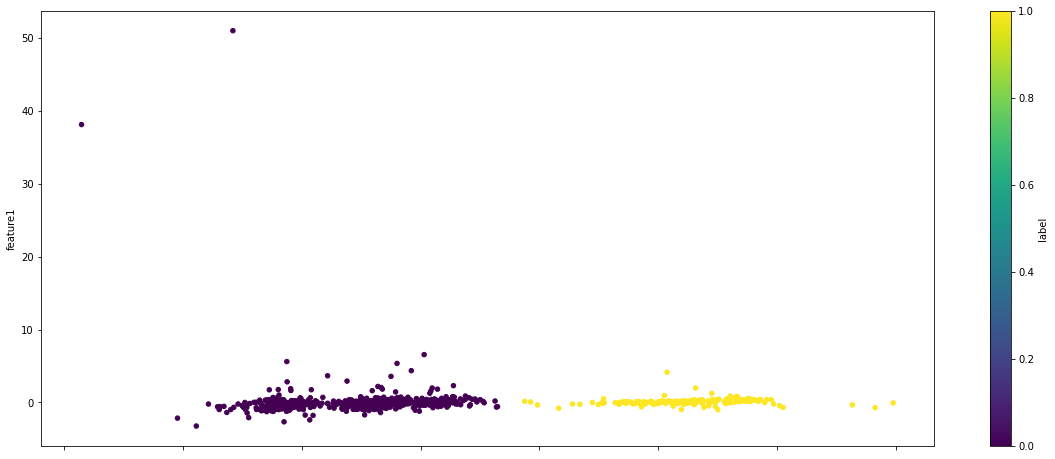

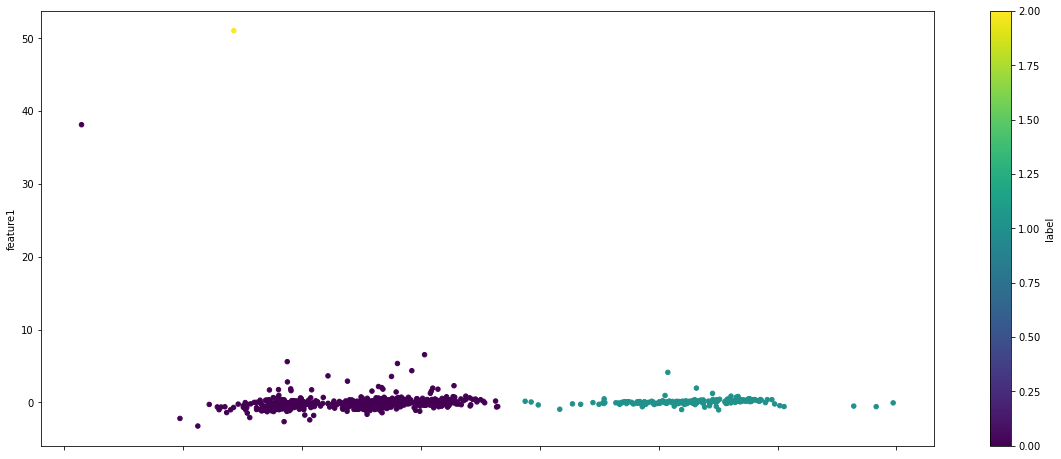

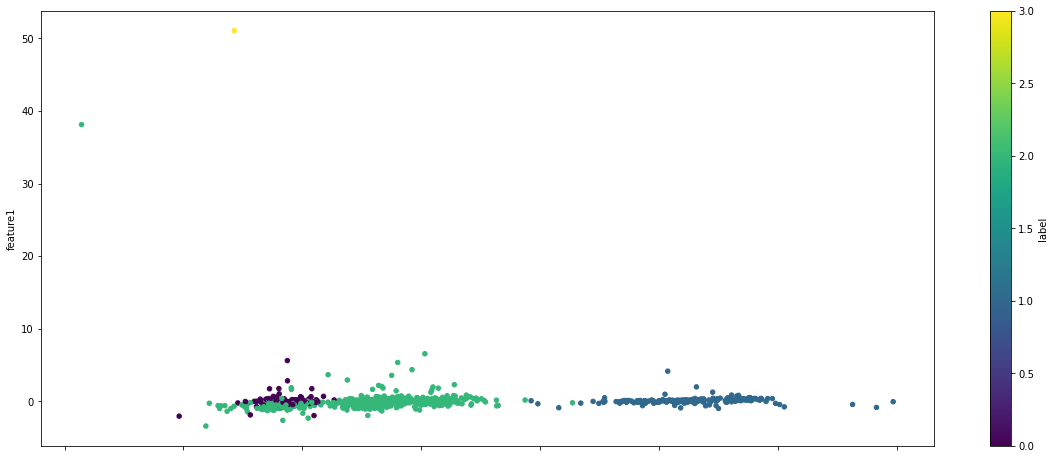

In [128]:
trees = pd.read_csv("./data/bipartition_10taxa_tree.csv")
sample = draw(trees)
normal_sample = normalize(sample, 10)
plot_cluster(normal_sample, 2),plot_cluster(normal_sample, 3),plot_cluster(normal_sample, 4)

In [120]:
# try t-SNE  https://danielmuellerkomorowska.com/2021/01/05/introduction-to-t-sne-in-python-with-scikit-learn/
#t-SNE works good for data with <50 dimentsions and <10000 objects
from sklearn.manifold import TSNE

def tSNEtrees(trees, label):
    x = trees.values
    tsne = TSNE(2)
    tsne_tree = tsne.fit_transform(x)
    tsne_df = pd.DataFrame(tsne_tree, columns = ["feature0" ,"feature1"])
    final_df = pd.concat([tsne_df,label], axis = 1)
    return final_df

In [121]:
# draw samples
trees = pd.read_csv("./data/bipartition_4taxa_tree.csv")
sample = draw(trees)
normal_sample = normalize(sample, 4)

E:\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
E:\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:xlabel='feature0', ylabel='feature1'>

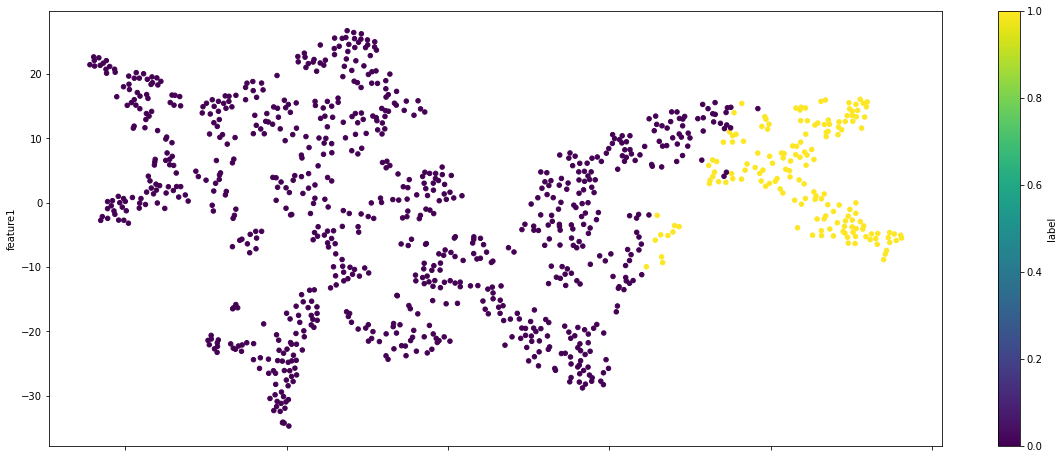

In [122]:
# plot
label_df = cluster_tree(normal_sample, 2)
tSNE_tree = tSNEtrees(normal_sample, label_df)
tSNE_tree.plot.scatter(x = "feature0", y = "feature1", c ='label',cmap="viridis",figsize=(20,8))

E:\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
E:\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:xlabel='feature0', ylabel='feature1'>

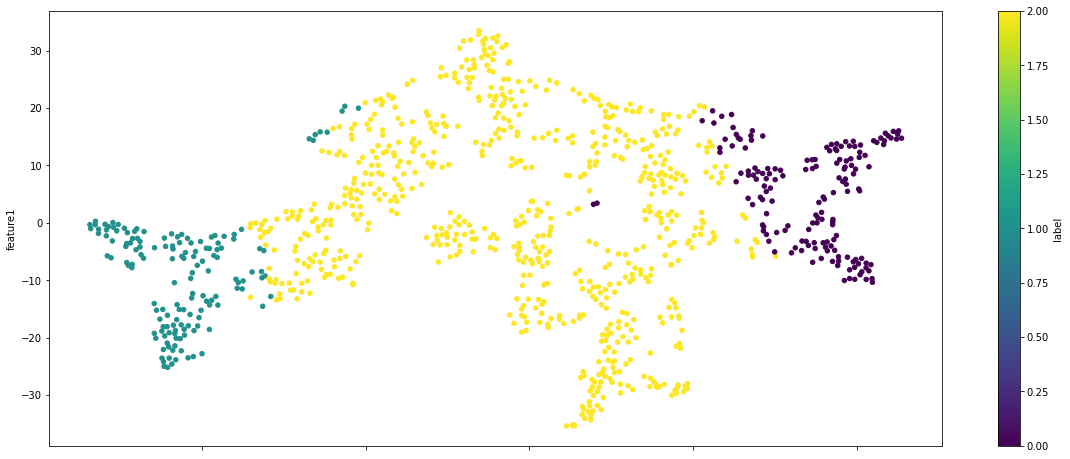

In [123]:
label_df = cluster_tree(normal_sample, 3)
tSNE_tree = tSNEtrees(normal_sample, label_df)
tSNE_tree.plot.scatter(x = "feature0", y = "feature1", c ='label',cmap="viridis",figsize=(20,8))

E:\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
E:\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:xlabel='feature0', ylabel='feature1'>

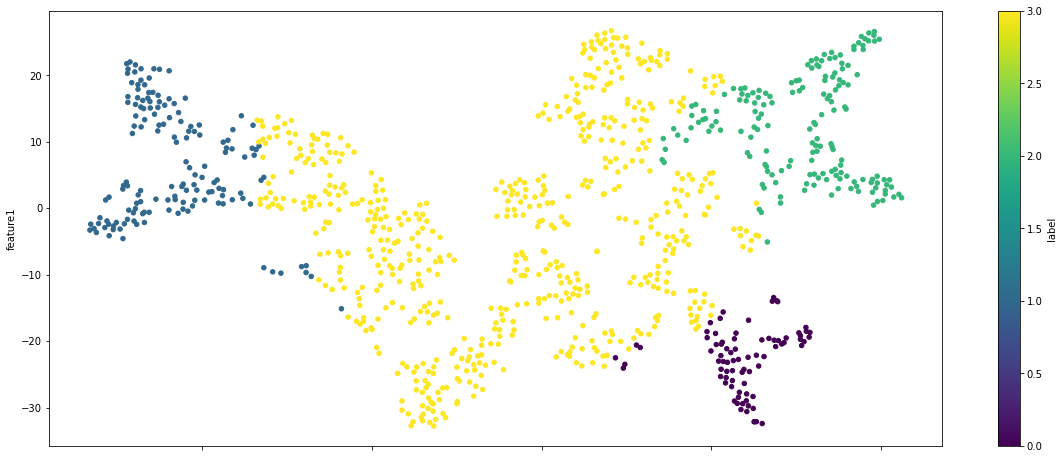

In [124]:
label_df = cluster_tree(normal_sample, 4)
tSNE_tree = tSNEtrees(normal_sample, label_df)
tSNE_tree.plot.scatter(x = "feature0", y = "feature1", c ='label',cmap="viridis",figsize=(20,8))